2024-12-26 14:34:14.300751: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-26 14:34:14.301756: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-26 14:34:14.304543: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-26 14:34:14.312482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735191254.325820   20315 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735191254.32

Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472531 entries, 0 to 2472530
Data columns (total 84 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           object 
 1   Protocol           object 
 2   Timestamp          object 
 3   Flow Duration      object 
 4   Tot Fwd Pkts       object 
 5   Tot Bwd Pkts       object 
 6   TotLen Fwd Pkts    object 
 7   TotLen Bwd Pkts    object 
 8   Fwd Pkt Len Max    object 
 9   Fwd Pkt Len Min    object 
 10  Fwd Pkt Len Mean   object 
 11  Fwd Pkt Len Std    object 
 12  Bwd Pkt Len Max    object 
 13  Bwd Pkt Len Min    object 
 14  Bwd Pkt Len Mean   object 
 15  Bwd Pkt Len Std    object 
 16  Flow Byts/s        object 
 17  Flow Pkts/s        object 
 18  Flow IAT Mean      object 
 19  Flow IAT Std       object 
 20  Flow IAT Max       object 
 21  Flow IAT Min       object 
 22  Fwd IAT Tot        object 
 23  Fwd IAT Mean       object 
 24  Fwd IAT Std        object 
 25  Fwd

/tmp/ipykernel_20315/299771055.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_features_categorical = train_features_categorical.applymap(str)



Encoding categorical features in train data...

Combined train features (before scaling):
    Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0      4378         2     168786         992595           609             0   
1     49095         2     106974         545016           609             0   
2     34646         1     130804         555388             0             1   
3     26434         2     227242         355710             0             1   
4     33381         2     209882         771439           885             1   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  ...  \
0                1                1                1                1  ...   
1                1                1                1                1  ...   
2             7557             5564             1404              198  ...   
3                1                1                1                1  ...   
4             4969                1        

/tmp/ipykernel_20315/299771055.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  val_features_categorical = val_features_categorical.applymap(str)



Encoding categorical features in validation data...

Combined validation features (before scaling):
    Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0     26127         2     136903         234886           575             0   
1     26309         2     111230        1006758          1113           762   
2     26127         2      63591        1011535           858             0   
3     48842         2      63055         937435           858           762   
4     35000         1     137319         642445           575             0   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  ...  \
0                1                1                1                1  ...   
1             5578             7272              518                1  ...   
2             9147                1             1190                1  ...   
3             2238            21857              617                1  ...   
4             6424               

/tmp/ipykernel_20315/299771055.py:97: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_features_categorical = test_features_categorical.applymap(str)



Encoding categorical features in test data...

Combined test features (before scaling):
    Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0     31366         2     170700         254582           577             0   
1     48736         2     145487         542601           577             0   
2     40786         2     212389         350991             0             1   
3     48736         2     145258         198244           577             0   
4     34299         1     101621        1030899             0             1   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  ...  \
0             2128                1             1865              272  ...   
1                1                1                1                1  ...   
2                1                1                1                1  ...   
3                1                1                1                1  ...   
4             6136             4765          

/tmp/ipykernel_20315/432265042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


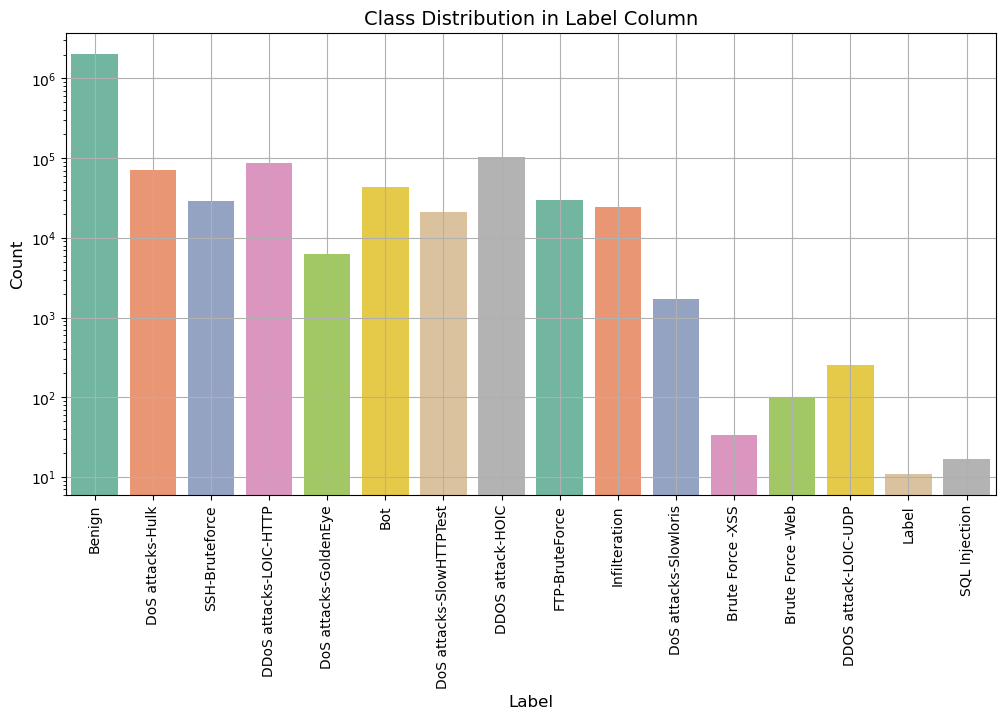

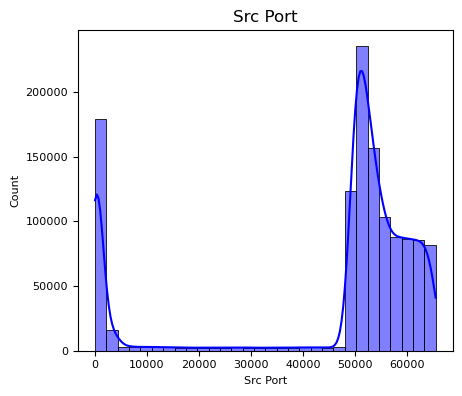

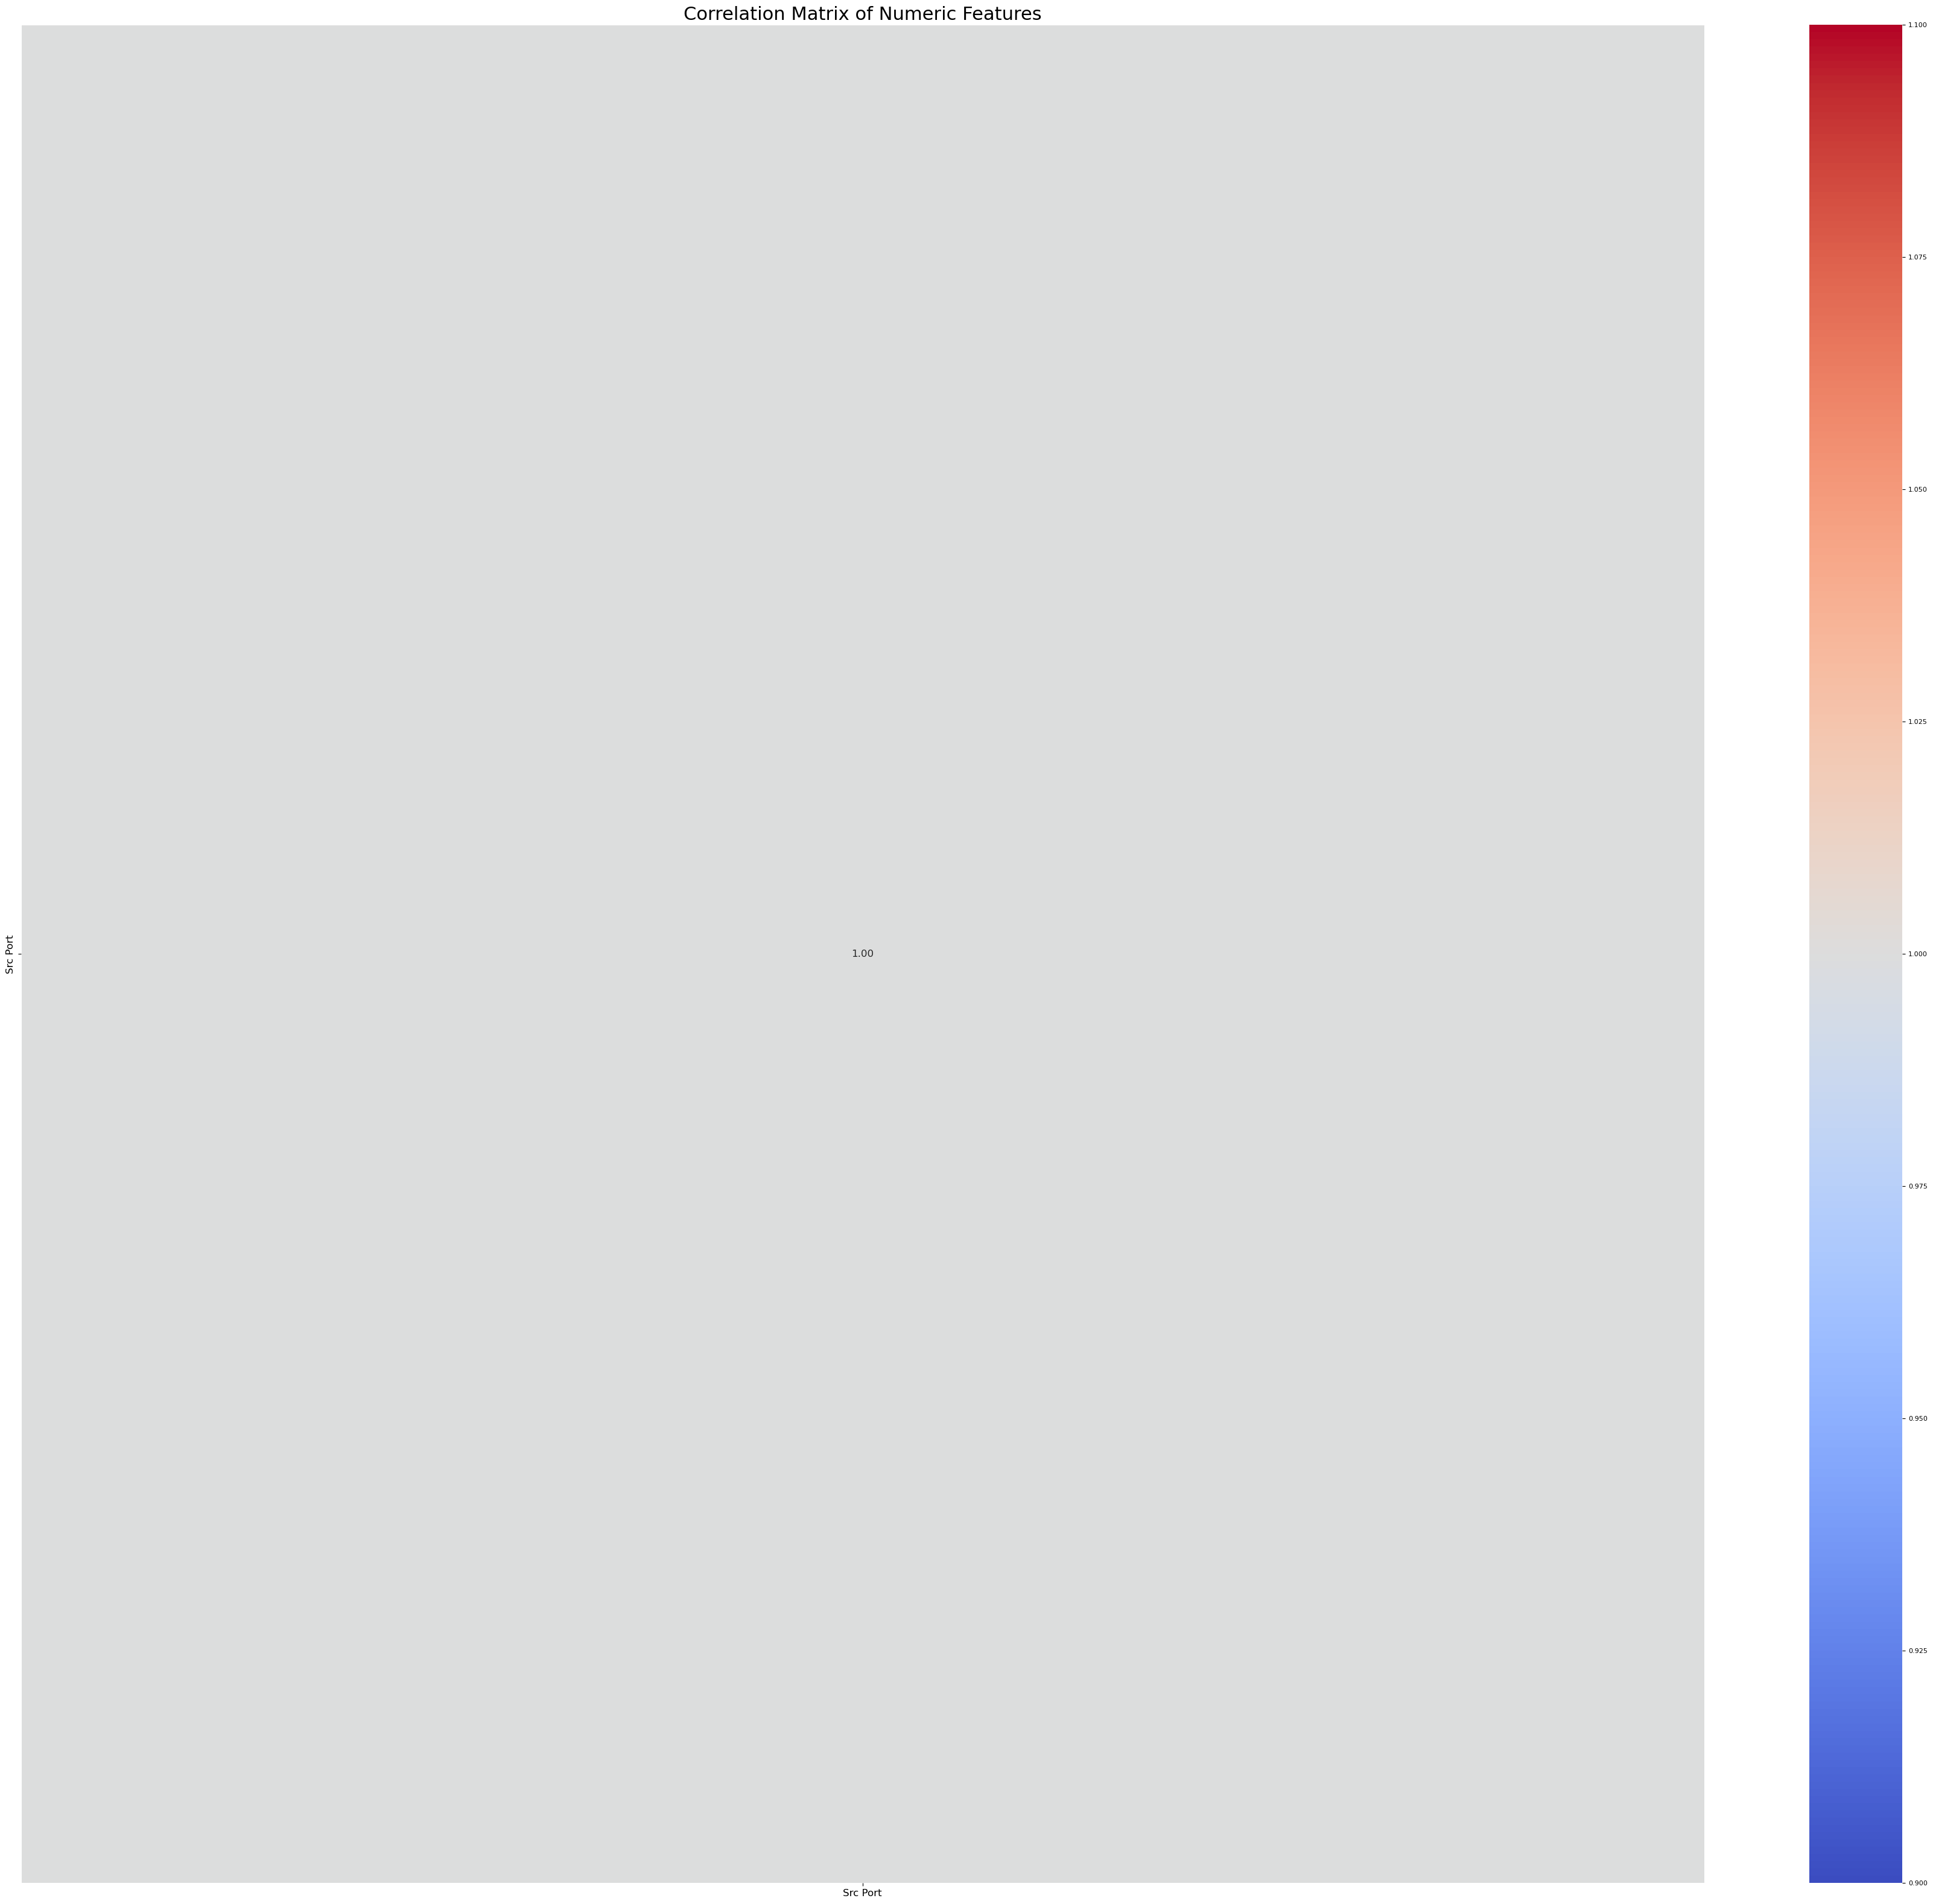

In [1]:
import import_ipynb
%run CICIDS_2018_data_preprocessing.ipynb

In [2]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Save reports
output_dir = r"./report/"
os.makedirs(output_dir, exist_ok=True)

# Traditional statistical methods
def t_test(X_train, X_val, y_train, y_val):
    t_stat, p_value = stats.ttest_ind(y_train, y_val)
    return p_value

def anova(X_train, X_val, y_train, y_val):
    f_stat, p_value = stats.f_oneway(y_train, y_val)
    return p_value

def linear_regression(X_train, X_val, y_train, y_val):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

def multiple_regression(X_train, X_val, y_train, y_val):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

def f_test(X_train, X_val, y_train, y_val):
    model1 = LinearRegression().fit(X_train, y_train)
    model2 = LinearRegression().fit(X_val, y_val)
    rss1 = np.sum((y_train - model1.predict(X_train)) ** 2)
    rss2 = np.sum((y_val - model2.predict(X_val)) ** 2)
    f_stat = (rss1 - rss2) / rss2
    p_value = 1 - stats.f.cdf(f_stat, len(X_train) - 1, len(X_val) - 1)
    return p_value

def mann_whitney_u(X_train, X_val, y_train, y_val):
    u_stat, p_value = stats.mannwhitneyu(y_train, y_val)
    return p_value

def pca(X_train, X_val, y_train, y_val):
    # Apply PCA and return the explained variance ratio
    pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    return pca.explained_variance_ratio_

def tsne(X_train, X_val, y_train, y_val):
    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    X_train_tsne = tsne.fit_transform(X_train)
    X_val_tsne = tsne.fit_transform(X_val)
    return X_train_tsne, X_val_tsne

# List of traditional statistical methods
methods = {
    't-test': t_test,
    'ANOVA': anova,
    'Linear Regression': linear_regression,
    'Multiple Regression': multiple_regression,
    'F-Test': f_test,
    'Mann-Whitney U Test': mann_whitney_u,
    'PCA': pca,
    't-SNE': tsne
}

# Store evaluation results for each method
results = []

# Standardize the data before applying PCA and t-SNE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train and evaluate each statistical method on the validation set
for name, method in methods.items():
    if name in ['Linear Regression', 'Multiple Regression']:
        # Apply linear regression and calculate mean squared error (MSE)
        mse = method(X_train_scaled, X_val_scaled, y_train, y_val)
        results.append({
            'Model': name,
            'Validation MSE': mse
        })
    elif name in ['PCA', 't-SNE']:
        # Apply PCA or t-SNE for dimensionality reduction and report explained variance
        if name == 'PCA':
            explained_variance = method(X_train_scaled, X_val_scaled, y_train, y_val)
            results.append({
                'Model': name,
                'Explained Variance Ratio': explained_variance
            })
        elif name == 't-SNE':
            # t-SNE returns transformed data; we'll just note this operation
            method(X_train_scaled, X_val_scaled, y_train, y_val)
            results.append({
                'Model': name,
                'Data after t-SNE': 'Transformed'
            })
    else:
        # Apply t-test, ANOVA, F-Test, Mann-Whitney U Test on the validation set
        p_value = method(X_train_scaled, X_val_scaled, y_train, y_val)
        results.append({
            'Model': name,
            'P-Value': p_value
        })

# Display the evaluation results
results_df = pd.DataFrame(results)
print("Model Evaluation on Validation Set:")
print(results_df)

# Save the validation set results
results_file = os.path.join(output_dir, 'statistical_method_validation_results.csv')
results_df.to_csv(results_file, index=False)
print(f"Validation set results saved to {results_file}")


Model Evaluation on Validation Set:
                 Model   P-Value  Validation MSE  \
0               t-test  0.202326             NaN   
1                ANOVA  0.202326             NaN   
2    Linear Regression       NaN         11.0984   
3  Multiple Regression       NaN         11.0984   
4               F-Test  1.000000             NaN   
5  Mann-Whitney U Test  0.447265             NaN   
6                  PCA       NaN             NaN   
7                t-SNE       NaN             NaN   

                   Explained Variance Ratio Data after t-SNE  
0                                       NaN              NaN  
1                                       NaN              NaN  
2                                       NaN              NaN  
3                                       NaN              NaN  
4                                       NaN              NaN  
5                                       NaN              NaN  
6  [0.1723938656799812, 0.1662588703324273]           

In [3]:
import pandas as pd
import os

results_df['Set'] = 'Validation'

print("\nCombined Results for Statistical Methods:")
print(results_df)

combined_results_file = os.path.join(output_dir, 'combined_statistical_method_results.csv')
results_df.to_csv(combined_results_file, index=False)
print(f"Combined results saved to {combined_results_file}")



Combined Results for Statistical Methods:
                 Model   P-Value  Validation MSE  \
0               t-test  0.202326             NaN   
1                ANOVA  0.202326             NaN   
2    Linear Regression       NaN         11.0984   
3  Multiple Regression       NaN         11.0984   
4               F-Test  1.000000             NaN   
5  Mann-Whitney U Test  0.447265             NaN   
6                  PCA       NaN             NaN   
7                t-SNE       NaN             NaN   

                   Explained Variance Ratio Data after t-SNE         Set  
0                                       NaN              NaN  Validation  
1                                       NaN              NaN  Validation  
2                                       NaN              NaN  Validation  
3                                       NaN              NaN  Validation  
4                                       NaN              NaN  Validation  
5                                     

Explained Variance Ratio: [1.72393866e-01 1.66258870e-01 1.00615647e-01 7.23999040e-02
 4.96794786e-02 3.76924435e-02 3.30626988e-02 2.84055761e-02
 2.18607285e-02 2.00897189e-02 1.94749469e-02 1.87070704e-02
 1.70036594e-02 1.46036190e-02 1.35257677e-02 1.33621390e-02
 1.28238786e-02 1.19368813e-02 1.15231703e-02 1.07383532e-02
 1.05657693e-02 9.68239434e-03 8.29582779e-03 7.95730153e-03
 7.21949352e-03 7.20856720e-03 6.84722512e-03 6.49395989e-03
 6.12837750e-03 5.63471364e-03 5.27166623e-03 4.97340649e-03
 4.71753575e-03 4.22404899e-03 3.83810205e-03 3.75325801e-03
 3.42073201e-03 3.33573671e-03 2.96843325e-03 2.87588201e-03
 2.76743277e-03 2.61139764e-03 2.48499211e-03 2.26039879e-03
 2.20130177e-03 2.14035697e-03 2.03678149e-03 1.95899714e-03
 1.91368876e-03 1.81829112e-03 1.73127682e-03 1.67813661e-03
 1.55113971e-03 1.46633778e-03 1.43883308e-03 1.34061963e-03
 1.25064483e-03 1.23931486e-03 1.07362098e-03 9.19976815e-04
 7.76225840e-04 7.04005991e-04 6.00821549e-04 3.36105674e-0

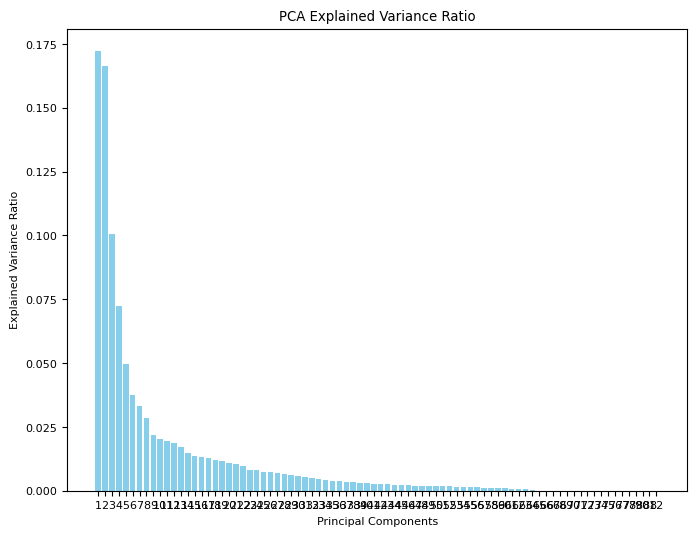

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pca(X_train, X_val, y_train, y_val, n_components=None):
    if n_components is None:
        n_components = min(X_train.shape[1], X_val.shape[1])
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    return pca.explained_variance_ratio_

explained_variance = pca(X_train_scaled, X_val_scaled, y_train, y_val)

print("Explained Variance Ratio:", explained_variance)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
plt.axhline(0, color='black',linewidth=0.5)  # 添加基线
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


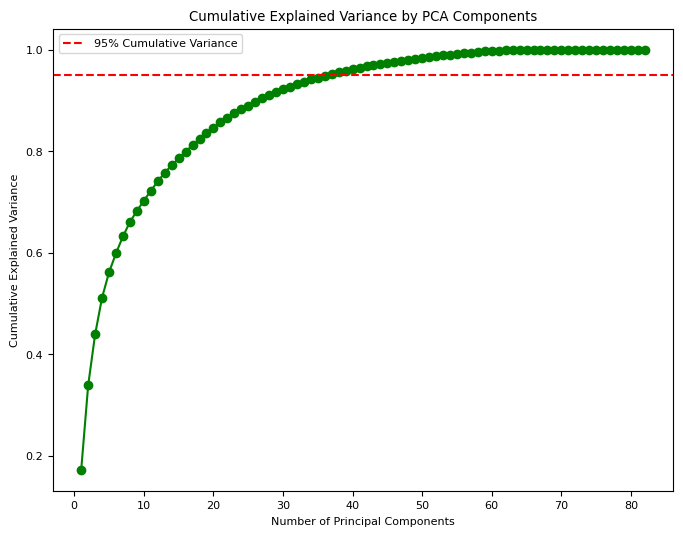

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color='green', marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.show()


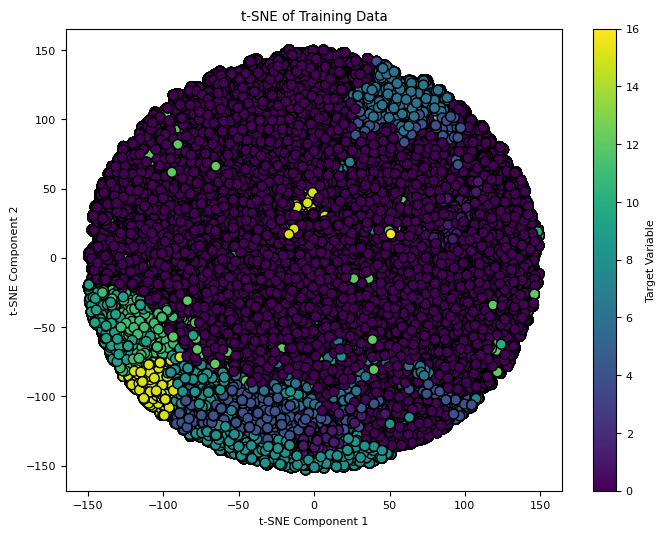

In [8]:
X_train_tsne, X_val_tsne = tsne(X_train_scaled, X_val_scaled, y_train, y_val)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("t-SNE of Training Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Target Variable')
plt.show()


/tmp/ipykernel_20315/1476098726.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Dataset_T_SNE_Projection.png")
/home/monetai2/anaconda3/envs/alvy/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


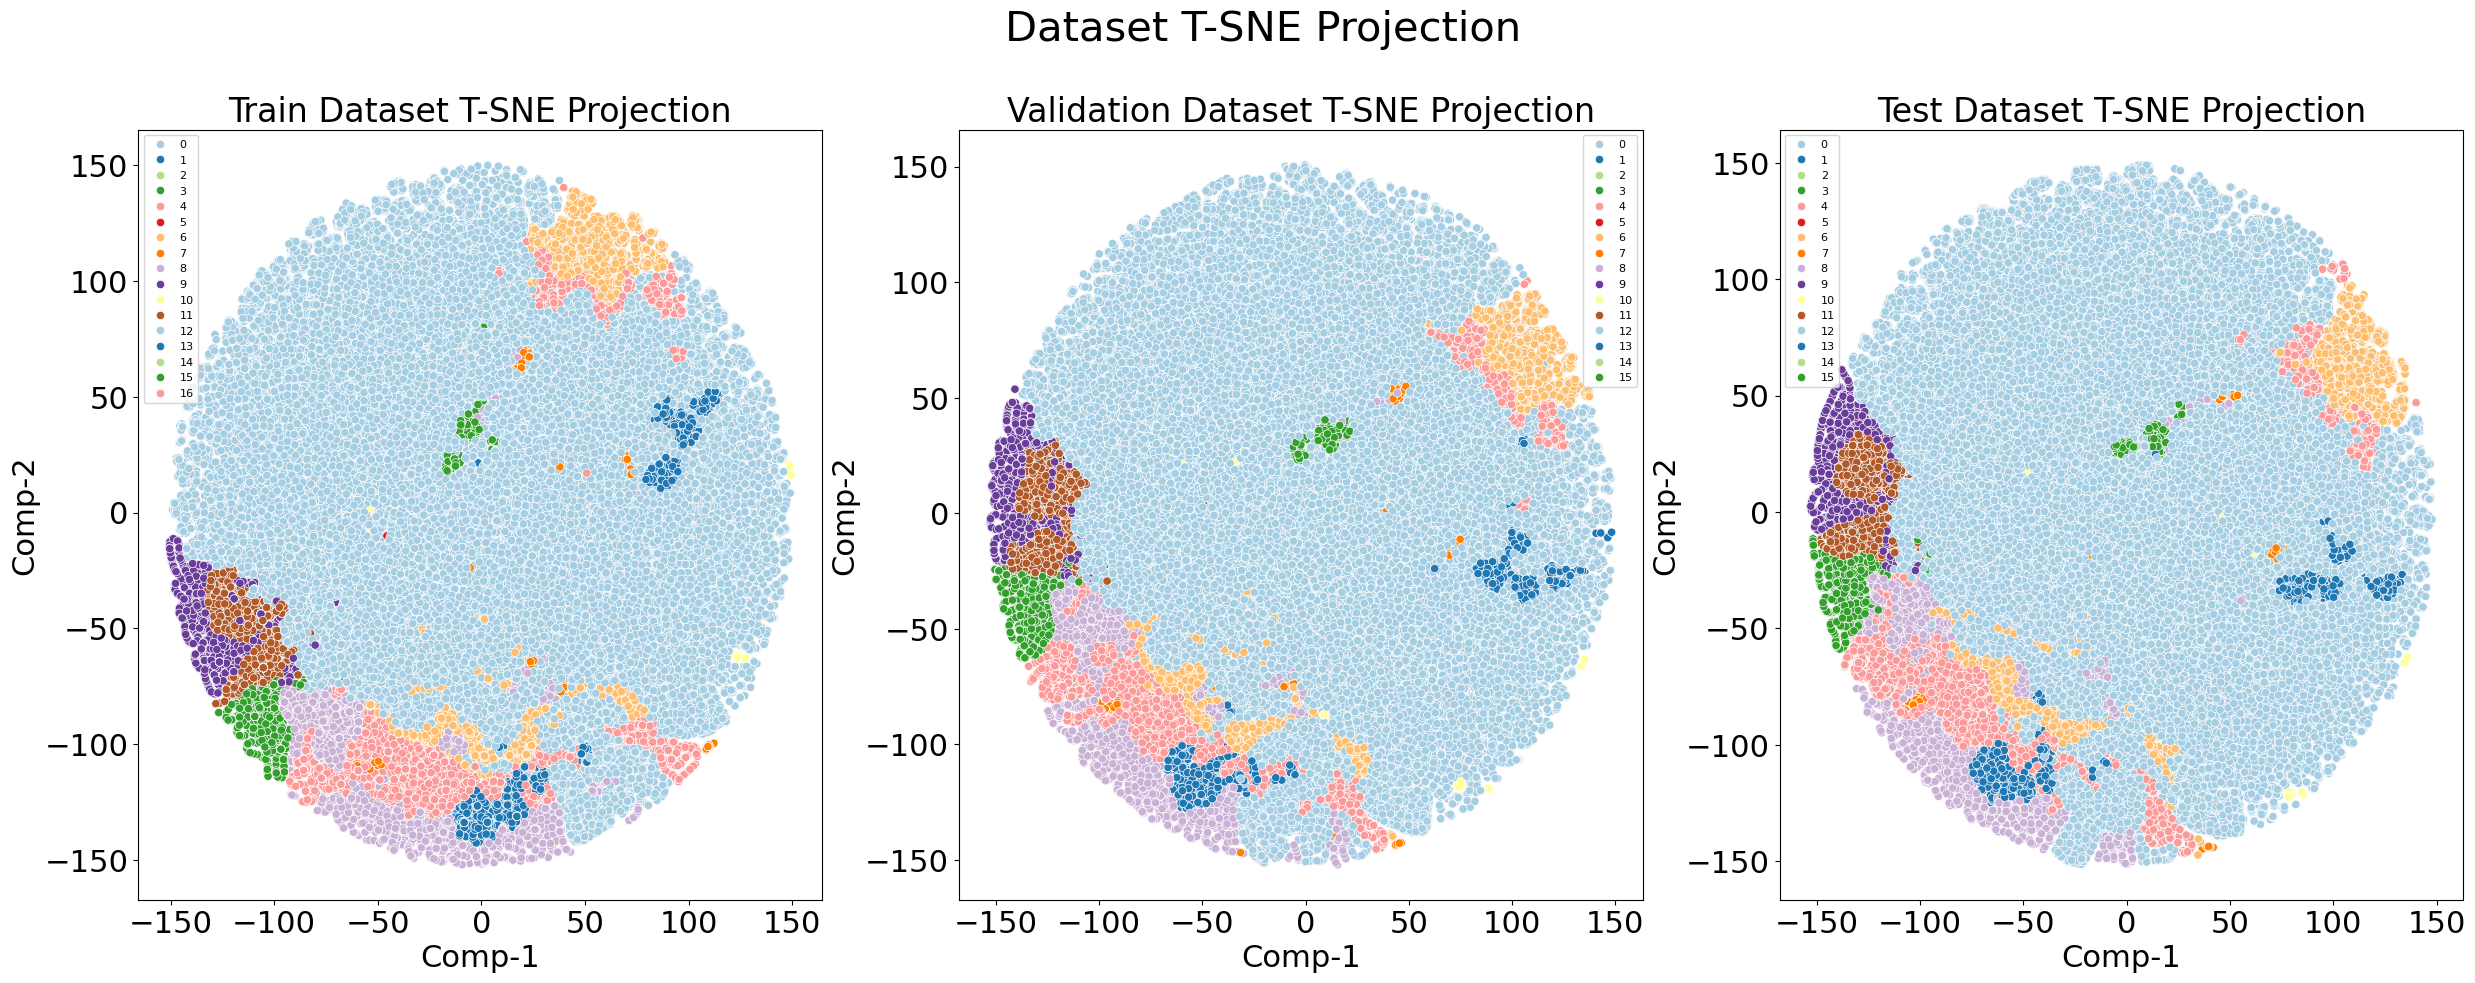

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def TSNE_visualizer(X):
    tsne = TSNE(n_components=2, random_state=42)
    return tsne.fit_transform(X)

t_sne_train = TSNE_visualizer(np.array(X_train, dtype='float'))
t_sne_val = TSNE_visualizer(np.array(X_val, dtype='float'))
t_sne_test = TSNE_visualizer(np.array(X_test, dtype='float'))

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

titles = ["Train", "Validation", "Test"]
c = [y_train, y_val, y_test]

for i in range(3):
    ax = axes[i]
    t_sne_data = [t_sne_train, t_sne_val, t_sne_test][i]
    sns.scatterplot(x=t_sne_data[:, 0], y=t_sne_data[:, 1], hue=c[i], ax=ax, palette="Paired")
    ax.set_title(f"{titles[i]} Dataset T-SNE Projection", fontsize=24)
    ax.set_xlabel('Comp-1', fontsize=22)
    ax.set_ylabel('Comp-2', fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=22)

plt.suptitle('Dataset T-SNE Projection', size=30, y=1.0)
plt.savefig("Dataset_T_SNE_Projection.png")
plt.show()
